In [193]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tot = pd.read_csv('NPS Total Visitors.csv')
#find change from previous year
i = tot.shape[0]-1
tot['Change'] = 0
while i > 0: 
   tot['Change'].iloc[i] = (tot['Visitor Count'].iloc[i] - 
                              tot['Visitor Count'][i-1])/tot['Visitor Count'].iloc[i-1]*100
   i = i-1


by_park = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"Date" : ["Year","Month"]},  keep_date_col=True)
by_park = by_park[['ParkName', 'UnitCode', 'ParkType', 'Region', 'State', 'Date', 'Year', 'Month', 'RecreationVisits']]
by_park['RecreationVisits'] = by_park['RecreationVisits'].replace(',','', regex=True)
by_park['RecreationVisits'] = by_park['RecreationVisits'].apply(pd.to_numeric)

#output to csv
cwd = os.getcwd()
path1 = cwd + "\Clean Data\AnnualVisits_1900-2022.csv"
path2 = cwd + "\Clean Data\MonthlyVisits_2000-2022.csv"
tot.to_csv(path1, index = False)
by_park.to_csv(path2, index=False)

C:\Users\Michael\AppData\Local\Temp\ipykernel_6340\2736845584.py:17: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  by_park = pd.read_csv('Annual Visitation By Park.csv', parse_dates= {"Date" : ["Year","Month"]},  keep_date_col=True)


In [194]:
tot.head()

,Year,Visitor Count,Change
0,1904,120690,0.000000
1,1905,140954,16.790123
2,1906,30569,-78.312783
3,1907,32935,7.739867
4,1908,42768,29.855777


In [195]:
tot.sort_values(['Change'], ascending=True)

,Year,Visitor Count,Change
2,1906,30569,-78.312783
38,1942,8891495,-56.600672
39,1943,6383513,-28.206528
116,2020,237064332,-27.617617
98,2002,227299880,-18.784903
...,...,...,...
32,1936,11749790,58.019484
15,1919,781178,79.078084
30,1934,6095201,87.217218
42,1946,20918012,92.694206


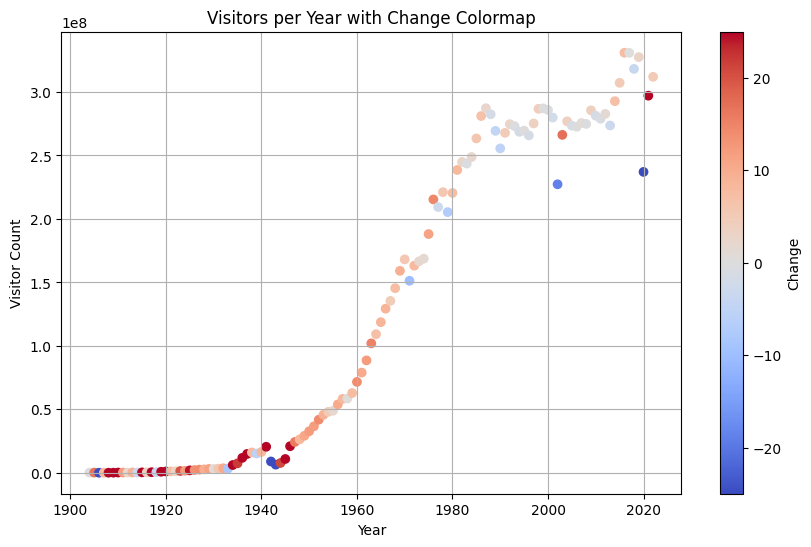

In [196]:
plt.figure(figsize=(10, 6))
plt.scatter(tot['Year'], tot['Visitor Count'], c=tot['Change'], cmap = 'coolwarm',
            vmin=-25, vmax=25)
plt.colorbar(label='Change')
plt.title('Visitors per Year with Change Colormap')
plt.xlabel('Year')
plt.ylabel('Visitor Count')
plt.grid(True)
plt.show()

In [247]:
by_park.tail()

,ParkName,UnitCode,ParkType,Region,State,Date,Year,Month,RecreationVisits
101042,Zion NP,ZION,National Park,Intermountain,UT,2022-08-01,2022,8,437134
101043,Zion NP,ZION,National Park,Intermountain,UT,2022-09-01,2022,9,423654
101044,Zion NP,ZION,National Park,Intermountain,UT,2022-10-01,2022,10,459697
101045,Zion NP,ZION,National Park,Intermountain,UT,2022-11-01,2022,11,291044
101046,Zion NP,ZION,National Park,Intermountain,UT,2022-12-01,2022,12,176846


In [222]:
rec_visits_month = pd.pivot_table(by_park, values='RecreationVisits', index=['Date', 'Month'], aggfunc = np.sum)
rec_visits_month = rec_visits_month.reset_index()
visits_per_month = rec_visits_month.query('Date >= 2018')
visits_per_month.head()

,Date,Month,RecreationVisits
216,2018-01-01,1,12635938
217,2018-02-01,2,13822694
218,2018-03-01,3,21035485
219,2018-04-01,4,25889186
220,2018-05-01,5,32211085


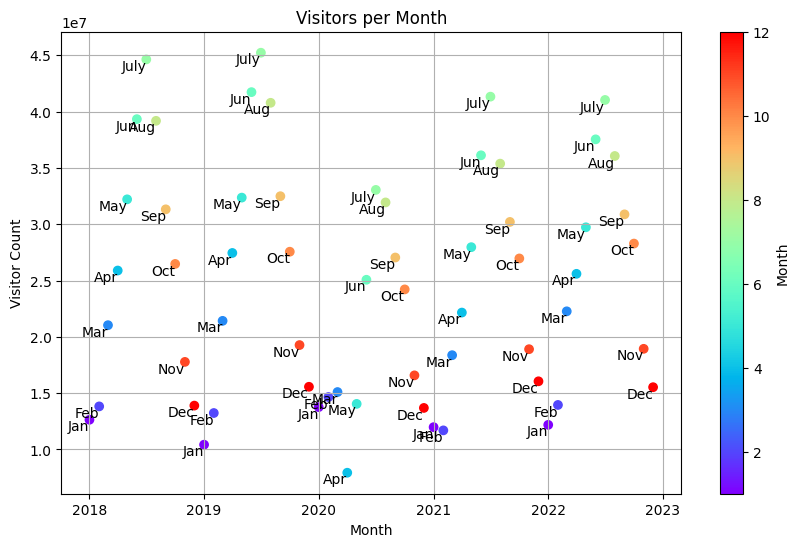

In [246]:
plt.figure(figsize=(10, 6))
plt.scatter(visits_per_month['Date'], visits_per_month['RecreationVisits'], 
            c = visits_per_month['Month'], cmap = 'rainbow')
plt.colorbar(label='Month')
plt.title('Visitors per Month')
plt.xlabel('Month')
plt.ylabel('Visitor Count')
plt.grid(True)

Month = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, row in visits_per_month.iterrows():
    plt.text(row['Date'], row['RecreationVisits'], str(Month[row['Month']]), ha='right', va='top')

plt.show()


In [ ]:
#Create a plot to show the park visitors per month from 2018 to 2022
rec_visits_month = rec_visits_month.query('Date > 2018')
rec_visits_month


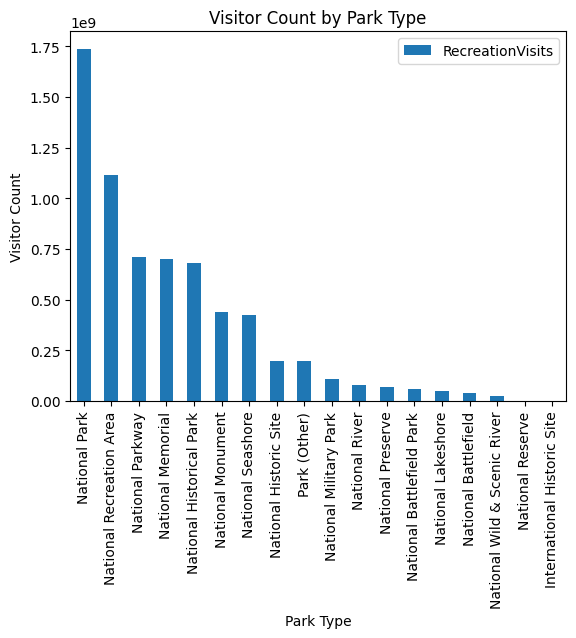

In [170]:
parktype_visits = pd.pivot_table(by_park, values='RecreationVisits', index=['ParkType'], aggfunc = np.sum)
parktype_visits = parktype_visits.sort_values(['RecreationVisits'], ascending=False).reset_index()
parktype_visits

# Plot the bar chart
ax = parktype_visits.plot(kind='bar', stacked=True)

# Set the x-axis tick labels to parktype
ax.set_xticklabels(parktype_visits.ParkType, rotation=90)

# Set the plot title and axis labels
plt.title('Visitor Count by Park Type')
plt.xlabel('Park Type')
plt.ylabel('Visitor Count')

# Display the bar chart
plt.show()


In [106]:
#select top park types 
top_types = []
i = 0
while i < 7: 
    top_types.append(parktype_visits['ParkType'][i])
    i=i+1

top_types_data = by_park.query('ParkType in @top_types')
top_types_data_2015 = top_types_data.query('Year in [2018, 2019, 2020, 2021, 2022]')
top_types_pivot = pd.pivot_table(top_types_data_2015, values='RecreationVisits', index='Year', columns='ParkType', aggfunc='sum')
top_types_pivot



ParkType,National Historical Park,National Memorial,National Monument,National Park,National Parkway,National Recreation Area,National Seashore
Year,,,,,,,
2018,33340856,38111959,21509596,87714135,29846041,51022484,18325744
2019,34904676,37653264,22344611,91010784,30186057,52110142,20273975
2020,20312921,15569260,9043977,67931703,27835471,48219772,18034969
2021,23742379,29483249,13786614,92251857,30774635,50366960,21776435
2022,26205985,39759274,19085277,88662181,30742853,50219269,20846510


<Figure size 2000x1200 with 0 Axes>

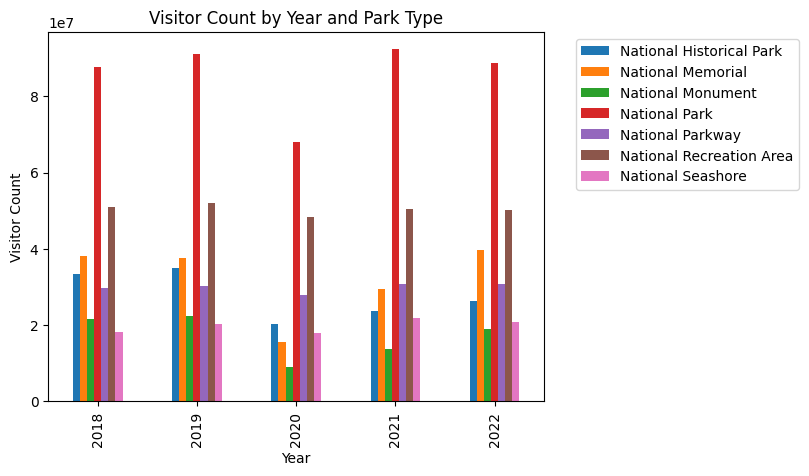

In [158]:
plt.figure(figsize=(20, 12))

ax = top_types_pivot.plot.bar()

plt.title('Visitor Count by Year and Park Type')
plt.xlabel('Year')
plt.ylabel('Visitor Count')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()
